In [186]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go



# 1. Nettoyage des données

## 1.1 Import des librairies

## 1.2 Fichiers Clients

In [187]:
customers = pd.read_csv("C:/Users/orlya/Desktop/Projet 6/customers.csv", sep=';')

In [188]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [189]:
customers.shape

(8621, 3)

In [190]:
customers.describe()

,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [191]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [192]:
#Les données sont au bon format, il n'y a pas de valeur manquante, ni aberrante, ni doublon et "client_id" constitue une clé primaire

#### 1.2.2 Ajout âge

In [193]:
year = datetime.now().year
customers['age'] = year - customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


In [194]:
#L'âge est une variable quantitative continue, arrondie à l'entier supérieur. Pour représenter une varible quantitative continue, on utilise l'histogramme qui permet d'agréger les valeurs. On représente donc des classes (intervalles) où la largeur du rectangle représente la largeur de la classe.

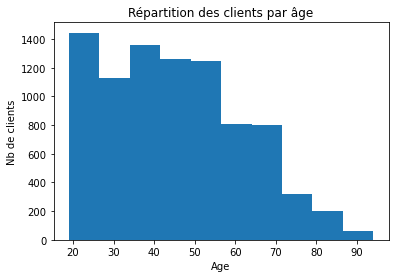

In [195]:
plt.hist(customers['age'])
plt.xlabel('Age') 
plt.ylabel("Nb de clients")
plt.title('Répartition des clients par âge')
plt.show()

#### 1.2.3 Ajout tranche d'âge

In [196]:
bin_labels=labels=['18-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
customers['tranche_age'] = pd.cut(x=customers['age'], bins=[10,19,29,39,49,59,69,79,89,99],labels=bin_labels)
customers.head()

,client_id,sex,birth,age,tranche_age
0,c_4410,f,1967,56,50-59
1,c_7839,f,1975,48,40-49
2,c_1699,f,1984,39,30-39
3,c_5961,f,1962,61,60-69
4,c_5320,m,1943,80,80-89


 ## 1.3 Fichiers Produits

In [197]:
products = pd.read_csv('C:/Users/orlya/Desktop/Projet 6/products.csv', sep=';')

In [198]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [199]:
products.shape

(3286, 3)

In [200]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [201]:
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


#### 1.3.1 Conversion de la categ en format "object"

In [202]:
products['categ'] = products['categ'].astype('str')

In [203]:
products.dtypes

id_prod     object
price      float64
categ       object
dtype: object

#### 1.3.2 Camembert Répartition des livres par catégorie

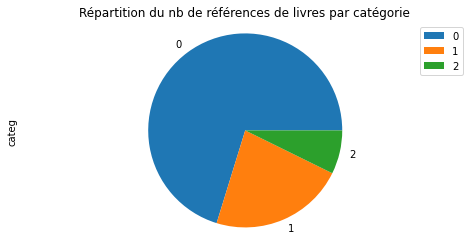

In [204]:
# camembert
plt.figure(figsize=(8,4))
products["categ"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.title('Répartition du nb de références de livres par catégorie')
plt.legend()
plt.show()

In [205]:
nbr_ref_categ = products.groupby(["categ"])["id_prod"].count()
nbr_ref_categ

categ
0    2308
1     739
2     239
Name: id_prod, dtype: int64

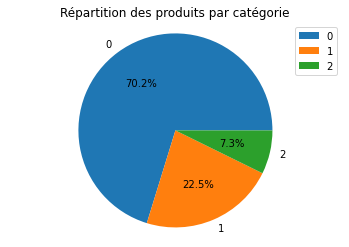

In [206]:
# Graphique:
fig1, ax1 = plt.subplots()
ax1.pie(nbr_ref_categ,
        labels=["0","1","2"],
        autopct="%1.1f%%")
ax1.axis("equal")
plt.title("Répartition des produits par catégorie")
plt.legend()
plt.show()

#### 1.3.3 Boxplot des livres par catégorie

No handles with labels found to put in legend.


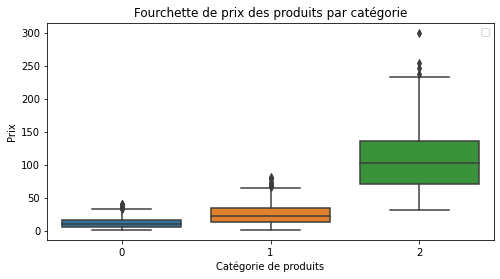

In [207]:
# boxplot par categorie de références de livres
plt.figure(figsize=(8,4))
sns.boxplot(x = "categ", y = "price", data = products)
plt.xlabel('Catégorie de produits') 
plt.ylabel("Prix")
plt.title("Fourchette de prix des produits par catégorie")
plt.legend()
plt.show() 

In [208]:
# Nb de références par categorie:
nb_ref_categ = products.groupby(["categ"])["id_prod"].count()

print("Nombre de références par catégorie:\n", nb_ref_categ)

# Prix moyen par categorie:
prix_categ = products.groupby(["categ"])["price"].mean()
print("Prix moyen d'un livre selon sa catégorie:\n",prix_categ)

# Prix median par categorie:
prix_categ = products.groupby(["categ"])["price"].median()
print("Prix médian d'un livre selon sa catégorie:\n",prix_categ)

Nombre de références par catégorie:
 categ
0    2308
1     739
2     239
Name: id_prod, dtype: int64
Prix moyen d'un livre selon sa catégorie:
 categ
0     11.732795
1     25.531421
2    108.354686
Name: price, dtype: float64
Prix médian d'un livre selon sa catégorie:
 categ
0     10.32
1     22.99
2    101.99
Name: price, dtype: float64


## 1.4 Fichier transactions

In [209]:
transactions = pd.read_csv('C:/Users/orlya/Desktop/Projet 6/Transactions.csv', sep=';')

In [210]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [211]:
transactions.shape

(687534, 4)

In [212]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

#### 1.4.1  Création d'une clé primaire

Création d'une clé composite qui concatène le client_id et la date 


In [213]:
transactions['clé composite'] = transactions['client_id'].str.cat(transactions['date'], na_rep='' )

In [214]:
transactions.shape

(687534, 5)

#### 1.4.2  Ajout d'une colonne "année_mois"

In [215]:
transactions['année_mois'] = transactions['date'].str[0:7]

In [216]:
transactions.head()

,id_prod,date,session_id,client_id,clé composite,année_mois
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03


In [217]:
transactions.shape

(687534, 6)

#### 1.4.3 Ajout de l'année, du mois et du jour

"transactions['année'] = pd.DatetimeIndex(transactions['date']).year
transactions['mois'] = pd.DatetimeIndex(transactions['date']).month
transactions['jour'] = pd.DatetimeIndex(transactions['date']).day   
transactions.head()

#### 1.4.4 Conversion au format datetime

In [218]:
transactions["date2"]= transactions["date"].str.split(" ", n = 1, expand = False).str[0]
transactions

,id_prod,date,session_id,client_id,clé composite,année_mois,date2
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01
...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,c_35732023-02-28 23:49:03.148402,2023-02,2023-02-28
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,c_502023-02-28 23:51:29.318531,2023-02,2023-02-28
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,c_4882023-02-28 23:53:18.929676,2023-02,2023-02-28
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,c_48482023-02-28 23:58:00.107815,2023-02,2023-02-28


In [219]:
transactions['date_ok'] = pd.to_datetime(transactions['date2'], format ='%Y-%m-%d')

In [220]:
transactions.dtypes

id_prod                  object
date                     object
session_id               object
client_id                object
clé composite            object
année_mois               object
date2                    object
date_ok          datetime64[ns]
dtype: object

In [221]:
transactions['annee'] = pd.DatetimeIndex(transactions['date_ok']).year
transactions['mois'] = pd.DatetimeIndex(transactions['date_ok']).month
transactions['jour'] = pd.DatetimeIndex(transactions['date_ok']).day   
transactions.head()

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1


# 2. Jointure entre les fichiers

Afin d'étudier l'évolution du chiffre d'affaires de cette librairie, qui vend en ligne ses produits depuis 2 ans, nous allons faire des jointures entre les 3 fichiers.
Le fichier "Transactions" contient 679332 occurences correspondant aux clients qui ont acheté une ou plusieurs fois des produits en ligne au cours des 2 dernières années.
Pour commencer notre analyse : OUTER JOIN afin d'avoir en plus les clients qui n'ont pas acheté et les produits qui ne se sont pas vendus:

## 2.1 OUTER JOIN entre "Transactions" et "Customers" pour ajout des clients sans achat :

In [222]:
# Ajout des clients sans achat
# ajouter indicator pour voir pour facilement retrouver les clients

df1 = pd.merge(transactions, customers, on="client_id", how="outer", indicator = True)
df1.shape

(687555, 16)

In [223]:
df1._merge.value_counts()


both          687534
right_only        21
left_only          0
Name: _merge, dtype: int64

In [224]:
# 21 client n'ont pas acheter les produits en ligne

## 2.2 OUTER JOIN entre "Transactions" et "Products" pour ajout les non vendus :

# 2.2.1 Ajout des produits non vendus



In [225]:
df2 = pd.merge(df1, products, on="id_prod", how="outer")
df2.shape

(687576, 18)

In [226]:
df2._merge.value_counts()

both          687534
right_only        21
left_only          0
Name: _merge, dtype: int64

## 2.3 LEFT JOIN pour ajout des caractéristiques"prix" et "catégorie" dans "transactions"

Nous allons désormais garder uniquement les ventes c'est à dire le fichier "transactions" que l'on va enrichir pour avoir les caractéristiques des produits vendus et le profil des clients :

In [227]:
# Jointure à gauche entre les fichiers "transactions" et "products" afin de disposer du prix du produit et de sa catégorie pour chaque ligne de transaction
transactions_products = pd.merge(transactions, products, how="left", left_on="id_prod", right_on="id_prod")

In [228]:
transactions_products.head()

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1,16.49,0


In [229]:
transactions_products.describe()

,annee,mois,jour,price
count,687534.000000,687534.000000,687534.000000,687534.000000
mean,2021.662289,6.547208,15.715258,17.493918
std,0.618184,3.480693,8.803949,18.238337
min,2021.000000,1.000000,1.000000,0.620000
25%,2021.000000,4.000000,8.000000,8.990000
50%,2022.000000,7.000000,16.000000,13.990000
75%,2022.000000,10.000000,23.000000,19.080000
max,2023.000000,12.000000,31.000000,300.000000


In [230]:
transactions_products.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
clé composite    0
année_mois       0
date2            0
date_ok          0
annee            0
mois             0
jour             0
price            0
categ            0
dtype: int64

#### 2.3.1 Calcul du prix moyen et médian par catégorie de livres

In [231]:
transactions_products_moyenne = transactions_products[['categ', 'price']].groupby('categ').mean()

In [232]:
transactions_products_moyenne

,price
categ,
0,10.638188
1,20.491600
2,76.207412


In [233]:
transactions_products_mediane = transactions_products[['categ', 'price']].groupby('categ').median()

In [234]:
transactions_products_mediane

,price
categ,
0,9.99
1,19.08
2,62.83


#### 2.3.2 Ajout du profil client pour chaque transaction

In [235]:
# ajout du profil client pour chaque transaction
transactions_profil = pd.merge(transactions_products, customers, how="left", left_on="client_id", right_on="client_id")
transactions_profil.head()

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ,sex,birth,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1,11.99,0,f,1967,56,50-59
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1,19.37,0,m,1960,63,60-69
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1,4.50,0,m,1988,35,30-39
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1,6.55,0,f,1989,34,30-39
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1,16.49,0,f,1956,67,60-69


In [236]:
transactions_profil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_prod        687534 non-null  object        
 1   date           687534 non-null  object        
 2   session_id     687534 non-null  object        
 3   client_id      687534 non-null  object        
 4   clé composite  687534 non-null  object        
 5   année_mois     687534 non-null  object        
 6   date2          687534 non-null  object        
 7   date_ok        687534 non-null  datetime64[ns]
 8   annee          687534 non-null  int64         
 9   mois           687534 non-null  int64         
 10  jour           687534 non-null  int64         
 11  price          687534 non-null  float64       
 12  categ          687534 non-null  object        
 13  sex            687534 non-null  object        
 14  birth          687534 non-null  int64         
 15  

# 3. Analyse des indicateurs de vente

## 3.1 Chiffre d'affaires global et du nombre de ventes

L'analyse porte sur la période du 01/03/2021 au 28/02/2023

In [237]:
CA_total = transactions_profil['price'].sum()
CA_total

12027663.100000003

In [238]:
Ventes_total = transactions_profil['session_id'].count()
Ventes_total

687534

## 3.2 Chiffre d'affaires et nombre de vente, par année

In [239]:
# CA par année
CA_annuel = transactions_profil.groupby(["annee"])["price"].sum()
CA_annuel


annee
2021    4944760.98
2022    6108681.81
2023     974220.31
Name: price, dtype: float64

In [240]:
# Nb ventes par année
Ventes_annuelles = transactions_profil.groupby(['annee'])["session_id"].count()
Ventes_annuelles

annee
2021    286671
2022    346380
2023     54483
Name: session_id, dtype: int64

## 3.3 Evolution mensuelle du chiffre d'affaires global

#### 3.3.1  Calcul du CA par mois

In [241]:
# évolution globale du CA
CA_mensuel = transactions_profil.groupby('date_ok').sum().reset_index()

In [242]:
 CA_mensuel = CA_mensuel.groupby(CA_mensuel['date_ok'].dt.to_period('M')).sum().reset_index()

In [243]:
CA_mensuel['CA_mensuel_K€'] = CA_mensuel.price / 1000
CA_mensuel.head(24)

,date_ok,annee,mois,jour,price,birth,age,CA_mensuel_K€
0,2021-03,57802621,85803,455301,482440.61,56568240,1291583,482.44061
1,2021-04,57483303,113772,443903,476109.30,56263669,1276520,476.10930
2,2021-05,57163985,141425,452166,492943.47,55946722,1273833,492.94347
3,2021-06,54263850,161100,415841,484088.56,53109429,1208121,484.08856
4,2021-07,49995498,173166,390168,482835.40,48937912,1107062,482.83540
5,2021-08,51838650,205200,412824,482284.79,50744390,1145560,482.28479
6,2021-09,67327594,299826,542549,507240.68,65873169,1521053,507.24068
7,2021-10,60674462,300220,449286,494733.16,59404874,1329632,494.73316
8,2021-11,57216531,311421,439126,516167.73,55982751,1290402,516.16773
9,2021-12,65595597,389484,531920,525917.28,64170857,1489654,525.91728


In [244]:
CA_mensuel.dtypes

date_ok          period[M]
annee                int64
mois                 int64
jour                 int64
price              float64
birth                int64
age                  int64
CA_mensuel_K€      float64
dtype: object

In [245]:
CA_mensuel.columns = CA_mensuel.columns.str.strip()

In [246]:
CA_mensuel.columns

Index(['date_ok', 'annee', 'mois', 'jour', 'price', 'birth', 'age',
       'CA_mensuel_K€'],
      dtype='object')

#### 3.3.2  Graphique de l'évolution mensuelle du CA

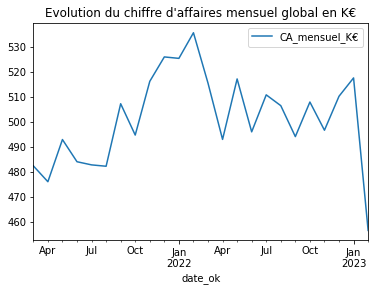

In [247]:
CA_mensuel.plot(x='date_ok', y='CA_mensuel_K€')
plt.title("Evolution du chiffre d'affaires mensuel global en K€")
plt.show()


In [248]:
CA_mensuel 

,date_ok,annee,mois,jour,price,birth,age,CA_mensuel_K€
0,2021-03,57802621,85803,455301,482440.61,56568240,1291583,482.44061
1,2021-04,57483303,113772,443903,476109.30,56263669,1276520,476.10930
2,2021-05,57163985,141425,452166,492943.47,55946722,1273833,492.94347
3,2021-06,54263850,161100,415841,484088.56,53109429,1208121,484.08856
4,2021-07,49995498,173166,390168,482835.40,48937912,1107062,482.83540
5,2021-08,51838650,205200,412824,482284.79,50744390,1145560,482.28479
6,2021-09,67327594,299826,542549,507240.68,65873169,1521053,507.24068
7,2021-10,60674462,300220,449286,494733.16,59404874,1329632,494.73316
8,2021-11,57216531,311421,439126,516167.73,55982751,1290402,516.16773
9,2021-12,65595597,389484,531920,525917.28,64170857,1489654,525.91728


#### 3.3.3  Décomposition en moyenne mobile

In [249]:
# Decomposition en moyenne mobile:
Moyenne_mobile = CA_mensuel['CA_mensuel_K€'].rolling(5).mean()
print(Moyenne_mobile)

0            NaN
1            NaN
2            NaN
3            NaN
4     483.683468
5     483.652304
6     489.878580
7     490.236518
8     496.652352
9     505.268728
10    513.879568
11    519.545732
12    523.690406
13    519.056648
14    517.299712
15    511.435138
16    506.477462
17    504.679610
18    504.902728
19    503.059762
20    503.189526
21    503.076802
22    505.291458
23    497.804504
Name: CA_mensuel_K€, dtype: float64


In [250]:
# il faut cherche avoir une courbe plus lisse il faut changer les valeur du rollinf tester 5, 7...
# Graphique moyenne mobile
#Moyenne_mobile.plot()
#plt.xlabel("Chiffre d'affaires en K€")
#plt.ylabel("Période")
#plt.title("Moyenne mobile du chiffre d'affaire global")

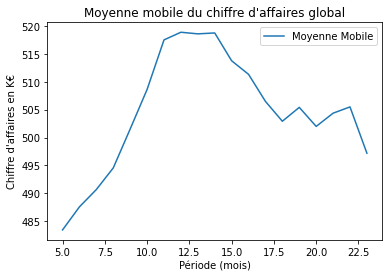

In [251]:
# Calculez la moyenne mobile sur une période de 5 jours
Moyenne_mobile = CA_mensuel['CA_mensuel_K€'].rolling(6).mean()

plt.plot(CA_mensuel.index, Moyenne_mobile, label='Moyenne Mobile')
plt.xlabel("Période (mois)")
plt.ylabel("Chiffre d'affaires en K€")
plt.title("Moyenne mobile du chiffre d'affaires global")

plt.legend()  # Ajoute une légende

plt.show()

## 3.4 Chiffre d'affaires par catégorie

In [252]:
# CA par catégorie
CA_annuel = transactions_profil.groupby(["categ"])["price"].sum()
CA_annuel

categ
0    4419730.97
1    4827657.11
2    2780275.02
Name: price, dtype: float64

In [253]:
# Nb de ventes par catégorie
Ventes_annuelles = transactions_profil.groupby(['categ'])["session_id"].count()
Ventes_annuelles

categ
0    415459
1    235592
2     36483
Name: session_id, dtype: int64

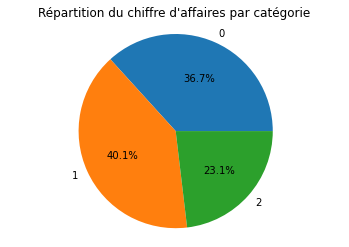

In [254]:
# Graphique: CA par catégorie
fig1, ax1 = plt.subplots()
ax1.pie(CA_annuel,
        labels=["0","1","2"],
        autopct="%1.1f%%")
ax1.axis("equal")
plt.title("Répartition du chiffre d'affaires par catégorie")
plt.show()

## 3.5 Evolution du chiffre d'affaires par catégorie de livres

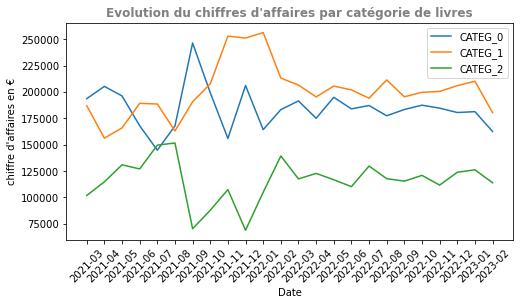

In [255]:
transactions_profil_0 = transactions_profil.loc[transactions_profil['categ'] == '0', :]
transactions_profil_1 = transactions_profil.loc[transactions_profil['categ'] == '1', :]
transactions_profil_2 = transactions_profil.loc[transactions_profil['categ'] == '2', :] 
transactions_profil_0 = transactions_profil_0.groupby('année_mois').sum()[['price']]
transactions_profil_1 = transactions_profil_1.groupby('année_mois').sum()[['price']]
transactions_profil_2 = transactions_profil_2.groupby('année_mois').sum()[['price']]
plt.figure(figsize=(8,4))
plt.plot(transactions_profil_0, label = 'CATEG_0')
plt.plot(transactions_profil_1, label = 'CATEG_1') 
plt.plot(transactions_profil_2, label = 'CATEG_2')
plt.legend()
plt.title("Evolution du chiffres d'affaires par catégorie de livres", fontsize=12, color='grey', fontweight='bold')
plt.xlabel("Date")
plt.ylabel("chiffre d'affaires en €")
plt.xticks(rotation=45)
plt.show()

## 3.6 Inégalité entre les clients

#### 3.6.1 Chiffre d'affaires par client

In [256]:
# CA par client
CA_client = transactions_products.groupby(["client_id"])["price"].sum().reset_index()
CA_client.sort_values(by='price', ascending=False)

,client_id,price
677,c_1609,326039.89
4388,c_4958,290227.03
6337,c_6714,153918.60
2724,c_3454,114110.57
634,c_1570,5285.82
...,...,...
3855,c_4478,13.36
4044,c_4648,11.20
7889,c_8114,9.98
7918,c_8140,8.30


Nous distinguons 4 gros clients dont le total des commandes est supérieur à 110 000€.
Il s'agit des clients c_1609, C_4958, C_6714 et C_3454. Nous allons étudier plus précisément ces 4 clients et nous poser la question : est ce qu'il faut les isoler de l'étude sur l'évolution du chiffre d'affaires global?

#### 3.6.1.1 ajout du profil client : sexe, âge, tranche d'âge

In [257]:
CA_client_profil = pd.merge(CA_client, customers, how="left", left_on="client_id", right_on="client_id")
CA_client_profil.sort_values(by='price', ascending=False)

,client_id,price,sex,birth,age,tranche_age
677,c_1609,326039.89,m,1980,43,40-49
4388,c_4958,290227.03,m,1999,24,20-29
6337,c_6714,153918.60,f,1968,55,50-59
2724,c_3454,114110.57,m,1969,54,50-59
634,c_1570,5285.82,f,1979,44,40-49
...,...,...,...,...,...,...
3855,c_4478,13.36,f,1970,53,50-59
4044,c_4648,11.20,m,2004,19,18-19
7889,c_8114,9.98,m,1962,61,60-69
7918,c_8140,8.30,m,1971,52,50-59


#### 3.6.2 Création du dataframe des clients pro

In [258]:
# création du dataframe des clients professionnels
list_pro = ("c_1609", "c_6714" , "c_3454",  "c_4958")
professionnels = transactions_products.loc[transactions_products["client_id"].isin(list_pro)]
professionnels

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,c_16092021-03-01 00:07:04.371179,2021-03,2021-03-01,2021-03-01,2021,3,1,5.86,0
13,0_1159,2021-03-01 00:11:57.832228,s_7,c_1609,c_16092021-03-01 00:11:57.832228,2021-03,2021-03-01,2021-03-01,2021,3,1,7.99,0
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,c_34542021-03-01 01:08:49.803921,2021-03,2021-03-01,2021-03-01,2021,3,1,10.99,0
78,0_1425,2021-03-01 01:56:41.944044,s_46,c_1609,c_16092021-03-01 01:56:41.944044,2021-03,2021-03-01,2021-03-01,2021,3,1,12.99,0
88,0_1469,2021-03-01 02:12:21.294004,s_53,c_1609,c_16092021-03-01 02:12:21.294004,2021-03,2021-03-01,2021-03-01,2021,3,1,14.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687482,0_1333,2023-02-28 22:40:24.405750,s_348416,c_6714,c_67142023-02-28 22:40:24.405750,2023-02,2023-02-28,2023-02-28,2023,2,28,5.99,0
687494,1_392,2023-02-28 23:04:51.081903,s_348416,c_6714,c_67142023-02-28 23:04:51.081903,2023-02,2023-02-28,2023-02-28,2023,2,28,18.11,1
687496,2_13,2023-02-28 23:08:40.035146,s_348403,c_4958,c_49582023-02-28 23:08:40.035146,2023-02,2023-02-28,2023-02-28,2023,2,28,50.99,2
687498,1_183,2023-02-28 23:10:49.235323,s_348416,c_6714,c_67142023-02-28 23:10:49.235323,2023-02,2023-02-28,2023-02-28,2023,2,28,24.99,1


#### 3.6.3 3 clients professionnels représentent 7,35% du chiffres d'affaires global



In [259]:
# calcul part des clients pro
print('Clients professionnels :',
    round(professionnels['price'].sum() / transactions_products['price'].sum() * 100, 2), '% du chiffre d\'affaires annuel')

Clients professionnels : 7.35 % du chiffre d'affaires annuel


In [260]:
CA_professionnels = professionnels['price'].sum() 
CA_professionnels

884296.0900000001

#### 3.6.4 Fréquence d'achat des clients professionnels

In [261]:
# nombre d'achats par client pro
nb_achats_pro = professionnels.groupby('client_id')["session_id"].count()
nb_achats_pro

client_id
c_1609    25586
c_3454     6793
c_4958     5222
c_6714     9199
Name: session_id, dtype: int64

In [262]:
# fréquence mensuelle d'achats des clients pro
fréquence_mensuelle_pro = nb_achats_pro/24
fréquence_mensuelle_pro

client_id
c_1609    1066.083333
c_3454     283.041667
c_4958     217.583333
c_6714     383.291667
Name: session_id, dtype: float64

In [263]:
# fréquence d'achats des clients pro par référence
nb_achats_pro_par_produit = professionnels.groupby('client_id')["id_prod"].count()
nb_achats_pro_par_produit

client_id
c_1609    25586
c_3454     6793
c_4958     5222
c_6714     9199
Name: id_prod, dtype: int64

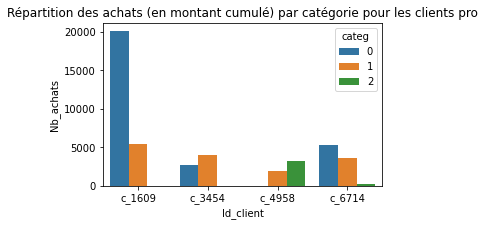

In [264]:
# répartition des achats par catégorie pour les clients pros
plt.figure(figsize=(5,3))
sns.countplot(data=professionnels, x="client_id", hue="categ")
plt.title("Répartition des achats (en montant cumulé) par catégorie pour les clients pro")
plt.xlabel("Id_client")
plt.ylabel("Nb_achats")
plt.show()


#### 3.6.6 Création du dataframe des clients particuliers

In [265]:
# création du dataframe des clients particuliers
particuliers = transactions_products[~transactions_products['client_id'].isin(list_pro)]
particuliers

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1,16.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,c_35732023-02-28 23:49:03.148402,2023-02,2023-02-28,2023-02-28,2023,2,28,21.92,1
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,c_502023-02-28 23:51:29.318531,2023-02,2023-02-28,2023-02-28,2023,2,28,48.99,2
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,c_4882023-02-28 23:53:18.929676,2023-02,2023-02-28,2023-02-28,2023,2,28,26.99,1
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,c_48482023-02-28 23:58:00.107815,2023-02,2023-02-28,2023-02-28,2023,2,28,8.99,0


In [266]:
# CA par client particuliers
CA_client_particuliers = particuliers.groupby(["client_id"])["price"].sum()
CA_client_particuliers.head()

client_id
c_1        629.02
c_10      1353.60
c_100      254.85
c_1000    2291.88
c_1001    1823.85
Name: price, dtype: float64

In [267]:
#LET JOIN CA_client_particuliers et customers
clients_acheteurs = pd.merge(CA_client_particuliers, customers, on="client_id", how="left")
clients_acheteurs.shape

(8596, 6)

In [268]:
# Repartition des clients particuliers par genre
repartition_genre = clients_acheteurs.groupby(["sex"])["client_id"].count()
print(repartition_genre)

sex
f    4478
m    4118
Name: client_id, dtype: int64


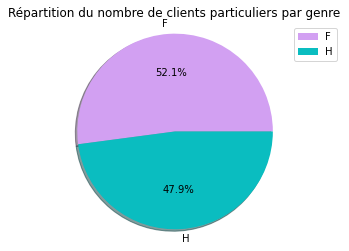

In [269]:
# Graphique:
fig2, ax2 = plt.subplots()
ax2.pie(repartition_genre,
        labels=["F","H"],
        autopct="%1.1f%%",
        colors=["#d2a0f2","#0abdc0"],
        shadow=True)
ax2.axis("equal")
plt.title("Répartition du nombre de clients particuliers par genre")
plt.legend()
plt.show()

In [270]:
# Depenses des clients particuliers par genre:
repartition_achats_genre = clients_acheteurs.groupby(["sex"])["price"].sum()
repartition_achats_genre

sex
f    5796925.08
m    5346441.93
Name: price, dtype: float64

In [271]:
nbr_achats_genre = clients_acheteurs.groupby(["sex"])["price"].count()
print("nombre total d'achats par genre:\n", nbr_achats_genre)

moy_achats_genre = clients_acheteurs.groupby(["sex"])["price"].mean()
print("montant moyen des achats par genre:\n", moy_achats_genre)

nombre total d'achats par genre:
 sex
f    4478
m    4118
Name: price, dtype: int64
montant moyen des achats par genre:
 sex
f    1294.534408
m    1298.310328
Name: price, dtype: float64


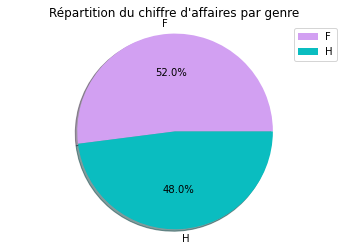

In [272]:
# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(repartition_achats_genre,
        labels=["F","H"],
        autopct="%1.1f%%",
        colors=["#d2a0f2","#0abdc0"],
        shadow=True)
ax3.axis("equal")
plt.title("Répartition du chiffre d'affaires par genre")
plt.legend()
plt.show()

#### 3.6.7 Répartition du CA des clients particuliers : Courbe de Lorentz et indice de Gini

L'indice de Gini mesure ici l'inégalité des chiffres d'affaires de tous les clients.

Indice de Gini : chiffre de 0 à 1 mesurant l'aire entre la bissectrice et la courbe de Lorenz

=> un coefficient de 0 indiquerait une égalité parfaite (tous les points s'aligneraient alors sur la bissectrice, réduisant l'aire à 0)
=> si l'indice était de 1, un seul client détiendrait la totalité du chiffre d'affaires (l'aire serait égale à celle du triangle prenant la bissectrice comme côté et 1:1 comme angle opposé)

La courbe de Lorenz montre encore une fois le chiffre d'affaires que les 4 clients (représentés par des croix) représentent à eux-seuls.

indice de Gini: 0.398


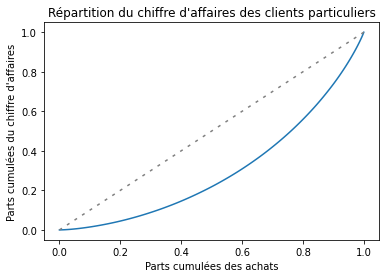

In [273]:
# Répartition du CA des clients particuliers : Courbe de Lorentz et indice de Gini
lorenz_CA_client = np.cumsum(np.sort(CA_client_particuliers)) / CA_client_particuliers.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), np.linspace(0,1,len(lorenz_CA_client)), color ="grey", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des achats")
plt.title("Répartition du chiffre d'affaires des clients particuliers")
aire_ss_courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

#### 3.6.8 Clients particuliers : nombre d'achats, montant moyen, fréquence d'achat

In [274]:
# Nombre d'achats et montant moyen dépensé par les clients particuliers :
nbr_achats_moy = particuliers.groupby(["client_id"])["session_id"].count().mean()
montant_achats_moy = particuliers.groupby(["client_id"])["price"].sum().mean()

print("Les clients particuliers achètent en moyenne", round(nbr_achats_moy/24), "articles par mois")
print("et le montant moyen du panier est de", round(montant_achats_moy/24), "euros")

Les clients particuliers achètent en moyenne 3 articles par mois
et le montant moyen du panier est de 54 euros


In [275]:
# Meilleurs clients particuliers:
meilleurs_clients = particuliers.groupby(["client_id"])["price"].sum()
print("Clients ayant le plus dépensé :")
print(meilleurs_clients.nlargest(100))

Clients ayant le plus dépensé :
client_id
c_1570    5285.82
c_3263    5276.87
c_2140    5260.18
c_2899    5214.05
c_7319    5155.77
           ...   
c_5449    4194.00
c_5835    4187.22
c_3949    4176.83
c_1938    4175.72
c_1744    4174.97
Name: price, Length: 100, dtype: float64


In [276]:
# Nombre moyen d'achats par sessions:
print("Il y a eu, pour les particuliers,",
      particuliers["session_id"].nunique(),
      "sessions")
print("Une session aboutie en moyenne à",
      round(particuliers.groupby(["session_id","client_id"])["id_prod"].count().mean(),2),
      "achats")

Il y a eu, pour les particuliers, 322466 sessions
Une session aboutie en moyenne à 1.99 achats


In [277]:
#Fréquence achats par utilisateur particulier
freq=particuliers[["client_id","session_id"]]
freq['client_id'].value_counts().describe()

count    8596.000000
mean       74.538623
std        68.074309
min         1.000000
25%        28.000000
50%        52.000000
75%        97.000000
max       405.000000
Name: client_id, dtype: float64

#### 3.6.9 Zoom sur le genre des clients particuliers

In [278]:
# Repartition des genres parmis nos clients:
repartition_genre = customers.groupby(["sex"])["client_id"].count()
print(repartition_genre)


sex
f    4490
m    4131
Name: client_id, dtype: int64


### 3.7 Zoom sur les produits

In [279]:
# Tops et Flops en CA
# CA par produit (pour tous les clients)
CA_produit = transactions_profil.groupby(["id_prod"])["price"].sum()

print("TOP 10 des premiers produits par CA")
print(CA_produit.nlargest(10))
print("TOP 10 des derniers produits par CA")
print(CA_produit.nsmallest(10))


TOP 10 des premiers produits par CA
id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    56617.47
1_369    56136.60
2_110    53846.25
1_383    53834.43
1_414    53522.18
Name: price, dtype: float64
TOP 10 des derniers produits par CA
id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_1601    1.99
0_541     1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64


In [280]:
# Tops et Flops en ventes:
nbr_ventes_ref = transactions_profil.groupby(["id_prod"])["session_id"].count()

print("TOP 10 des références les plus vendues")
print(nbr_ventes_ref.nlargest(10))
print("TOP 10 des références les moins vendues")
print(nbr_ventes_ref.nsmallest(10))


TOP 10 des références les plus vendues
id_prod
1_369    2340
1_417    2269
1_414    2246
1_498    2202
1_425    2163
1_403    2040
1_413    2036
1_412    2014
1_406    2003
1_407    2001
Name: session_id, dtype: int64
TOP 10 des références les moins vendues
id_prod
0_1151    1
0_1284    1
0_1379    1
0_1498    1
0_1539    1
0_1601    1
0_1633    1
0_1683    1
0_1728    1
0_2201    1
Name: session_id, dtype: int64


indice de Gini: 0.744


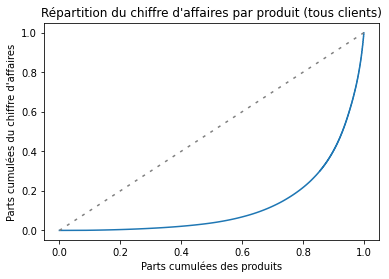

In [281]:
# Courbe de Lorentz et indice de Gini : répartition du CA par produit (tous clients confondus)
lorenz_CA_client = np.cumsum(np.sort(CA_produit)) / CA_produit.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), np.linspace(0,1,len(lorenz_CA_client)), color ="grey", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des produits")
plt.title("Répartition du chiffre d'affaires par produit (tous clients)")
aire_ss_courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

In [282]:
# CA par produit (uniquement pour les clients particuliers)
CA_produit_particuliers = particuliers.groupby(["id_prod"])["price"].sum()
CA_produit_particuliers.head()

id_prod
0_0       4301.25
0_1       5132.33
0_10       359.00
0_100       61.80
0_1000    2722.32
Name: price, dtype: float64

indice de Gini: 0.743


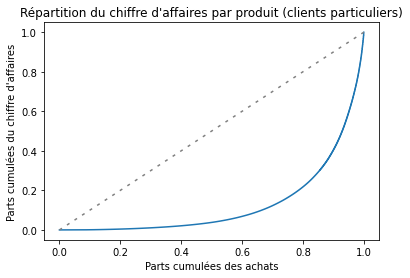

In [283]:
# Courbe de Lorentz et indice de Gini : répartition du CA par produit (clients particuliers)
lorenz_CA_client = np.cumsum(np.sort(CA_produit_particuliers)) / CA_produit_particuliers.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), np.linspace(0,1,len(lorenz_CA_client)), color ="grey", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des achats")
plt.title("Répartition du chiffre d'affaires par produit (clients particuliers)")
aire_ss_courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

In [284]:
# CA par produit (uniquement pour les clients pros)
CA_produit_pros = professionnels.groupby(["id_prod"])["price"].sum()
CA_produit_pros.head()

id_prod
0_0       356.25
0_1       219.80
0_10       35.90
0_1000    232.56
0_1001    104.79
Name: price, dtype: float64

indice de Gini: 0.699


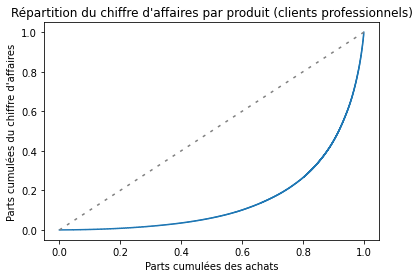

In [285]:
# Courbe de Lorentz et indice de Gini : répartition du CA par produit (clients professionnels)
lorenz_CA_client = np.cumsum(np.sort(CA_produit_pros)) / CA_produit_pros.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_CA_client)), np.linspace(0,1,len(lorenz_CA_client)), color ="grey", dashes=[2,4])
plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des achats")
plt.title("Répartition du chiffre d'affaires par produit (clients professionnels)")
aire_ss_courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

# 4. Analyse des corrélations

## 4.1 Corrélations entre catégorie achetée et genre  ? => entre 2 variables qualitatives : CHI-2

In [286]:
transactions_profil

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ,sex,birth,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1,11.99,0,f,1967,56,50-59
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1,19.37,0,m,1960,63,60-69
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1,4.50,0,m,1988,35,30-39
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1,6.55,0,f,1989,34,30-39
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1,16.49,0,f,1956,67,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,c_35732023-02-28 23:49:03.148402,2023-02,2023-02-28,2023-02-28,2023,2,28,21.92,1,f,1996,27,20-29
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,c_502023-02-28 23:51:29.318531,2023-02,2023-02-28,2023-02-28,2023,2,28,48.99,2,f,1994,29,20-29
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,c_4882023-02-28 23:53:18.929676,2023-02,2023-02-28,2023-02-28,2023,2,28,26.99,1,f,1985,38,30-39
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,c_48482023-02-28 23:58:00.107815,2023-02,2023-02-28,2023-02-28,2023,2,28,8.99,0,m,1953,70,70-79


In [287]:
# Nb d'achats par catégorie et par sexe => matrice des valeurs observées
X = 'sex'
Y = 'categ'
cont = transactions_profil[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

cont

categ,0,1,2,Total
sex,,,,
f,206103,119307,17283,342693
m,209356,116285,19200,344841
Total,415459,235592,36483,687534


In [288]:
transactions_profil.shape

(687534, 17)

Text(0.5, 1.0, 'Répartition des achats des clients particuliers par catégorie et genre')

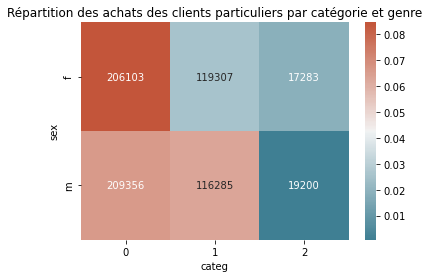

In [289]:
# création d'une heatmap par genre et catégorie de produits
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(particuliers)
indep = tx.dot(ty) / n
c = cont.fillna(0) # On remplace les valeurs nulles par 0

measure = (c-indep)**2/indep # On compare le tableau c à indep
xi_n = measure.sum().sum() # la somme des mesures de toutes les cases
table = measure/xi_n # On divise chaque case par la somme des mesures de toutes les cases (échelle de couleur entre 0 et 1)
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt="d",cmap=sns.diverging_palette(220, 20, n=200),
)
plt.title("Répartition des achats des clients particuliers par catégorie et genre")

La map nous confirme qu'il y a peu de variations entre genres au sein des catégories.L'achat d'une catégorie en particulier ne dépendrait pas du genre de l'acheteur.
Afin de vérifier ce constat, nous allons calculer :

In [290]:
# calcul du Chi-2 et de la P-value
chi2, p, dof, expected = stats.chi2_contingency(cont)
print(f'Le CHI-2 est de {chi2:.2f} et la p-value est de {p:.4f}')

Le CHI-2 est de 158.25 et la p-value est de 0.0000


Chi2 :
Ce test permet de vérifier l'absence de lien statistique entre deux variables X et Y. Les deux sont dites indépendantes lorsqu'il n'existe aucun lien

H0 = L’hypothèse nulle, les variables sont indépendantes
H1 = L’hypothèse alternative, les variables ne sont pas indépendantes


In [291]:
print('la P-value est égale à',(format(p,'.17f')))
print("P-value < 0.01 je ne peux pas rejette HO on peut donc conclure que le lien entre le sexe et la categorie de livre achete est statistiquement significatif")

la P-value est égale à 0.00000000000000000
P-value < 0.01 je ne peux pas rejette HO on peut donc conclure que le lien entre le sexe et la categorie de livre achete est statistiquement significatif


## 4.2 Corrélations entre âge et nb de clients => 2 variables quantitatives : test non paramétrique d'Anderson

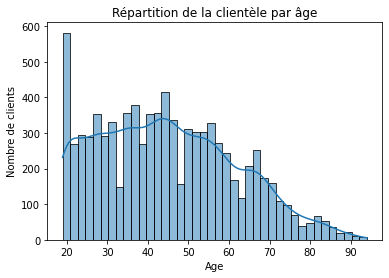

In [292]:
# Répartition de la clientèle par âge
sns.histplot(data=CA_client_profil["age"],
             bins=40,
             kde=True)
plt.title("Répartition de la clientèle par âge")
plt.ylabel("Nombre de clients")
plt.xlabel("Age")
plt.show()

In [293]:
# Test de Normalite de la repartition des ages:
print(stats.anderson(CA_client_profil["age"], dist="norm"))

AndersonResult(statistic=53.7356722377026, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


On utilise le test d'Anderson Darling car il est non paramétrique et utilisé pour les grands échantillons. 
H0 = les données suivent une distribution normale
alpha 1% 
statistique du test d'Anderson (54) > valeure critique (1) 
On rejette H0. On considère que l'âge ne suit pas une distribution normale avec un risque d'erreur de 1%

## 4.3 Corrélations entre catégorie achetée et tranches d'âge =>2 variables qualitatives : Tableau de contingence


In [294]:
# création d'une heatmap par tranche d'âge et catégorie de produits

In [295]:
X = 'tranche_age'
Y = 'categ'
cont2 = transactions_profil[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont2

categ,0,1,2,Total
tranche_age,,,,
18-19,3418,6067,6012,15497
20-29,10994,21589,23051,55634
30-39,119972,41628,4696,166296
40-49,177018,56309,769,234096
50-59,62257,54896,1056,118209
60-69,24801,32685,550,58036
70-79,11541,15065,219,26825
80-89,4954,6607,122,11683
90-100,504,746,8,1258


Text(0.5, 1.0, "Répartition du nb d'achats par catégorie et tranche d'âge")

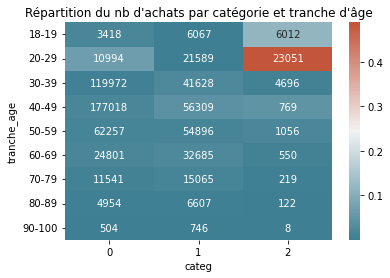

In [296]:
tx = cont2.loc[:,["Total"]]
ty = cont2.loc[["Total"],:]
n = len(particuliers)
indep = tx.dot(ty) / n
c = cont2.fillna(0) # On remplace les valeurs nulles par 0

measure = (c-indep)**2/indep # On compare le tableau c à indep
xi_n = measure.sum().sum() # la somme des mesures de toutes les cases
table = measure/xi_n # On divise chaque case par la somme des mesures de toutes les cases (échelle de couleur entre 0 et 1)
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt="d", cmap=sns.diverging_palette(220, 20, n=200))
plt.title("Répartition du nb d'achats par catégorie et tranche d'âge")

In [297]:
# calcul du Chi-2 et de la P-value
chi2, p, dof, expected = stats.chi2_contingency(cont2)
print(f'Le CHI-2 est de {chi2:.2f} et la p-value est de {p:.4f}')


Le CHI-2 est de 259031.73 et la p-value est de 0.0000


Chi2 : Ce test permet de vérifier l'absence de lien statistique entre deux variables X et Y. Les deux sont dites indépendantes lorsqu'il n'existe aucun lien

H0 = L’hypothèse nulle, les variables sont indépendantes H1 = L’hypothèse alternative, les variables ne sont pas indépendantes

In [298]:
print('la P-value est égale à',(format(p,'.17f')))
print("P-value < 0.01 je ne peux pas rejette HO on peut donc conclure que le lien entre le sexe et la categorie de livre achete est statistiquement significatif")

la P-value est égale à 0.00000000000000000
P-value < 0.01 je ne peux pas rejette HO on peut donc conclure que le lien entre le sexe et la categorie de livre achete est statistiquement significatif


## 4.4 Corrélations entre âge et chiffre d'affaires =>2 variables quantitatives : coefficient de Pearson

Le coefficient de corrélation de Pearson permet d'analyser les relations linéaires 
Il permet de mesurer à la fois la force et le sens d'une association. Variant de -1 à +1, il vaut 0 lorsqu'il n'existe pas d'association. Plus ce coefficient est proche de -1 ou +1, plus l'association entre les deux variables est forte, jusqu'à être parfaite

In [299]:
# Calcul de la somme des prix 'price' pour chaque âge
age_CA = transactions_profil[['age', 'price']]

# Conversion des valeurs en K€
age_CA['price'] = age_CA['price'] / 1000

# Tri des données par âge en ordre décroissant
age_CA = age_CA.sort_values(by='age', ascending=False)

# Affichage des cinq premières lignes
print(age_CA.head())

        age    price
513235   94  0.02299
113729   94  0.01665
128787   94  0.01303
314181   94  0.01405
577552   94  0.01665


C:\Users\orlya\AppData\Local\Temp/ipykernel_13648/3724169059.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
# Somme des ventes 'price' pour toutes les transactions sans regroupement par âge
age_CA = transactions_profil[['age', 'price']].sort_values(by='age', ascending=False)

# Conversion des valeurs en K€
age_CA['price'] = age_CA['price'] / 1000

# Affichage des cinq premières lignes
print(age_CA.head())


        age    price
513235   94  0.02299
113729   94  0.01665
128787   94  0.01303
314181   94  0.01405
577552   94  0.01665


#### 4.4.1.1 Visualisation avec un scatterplot (âge clients vs montant total des achats)

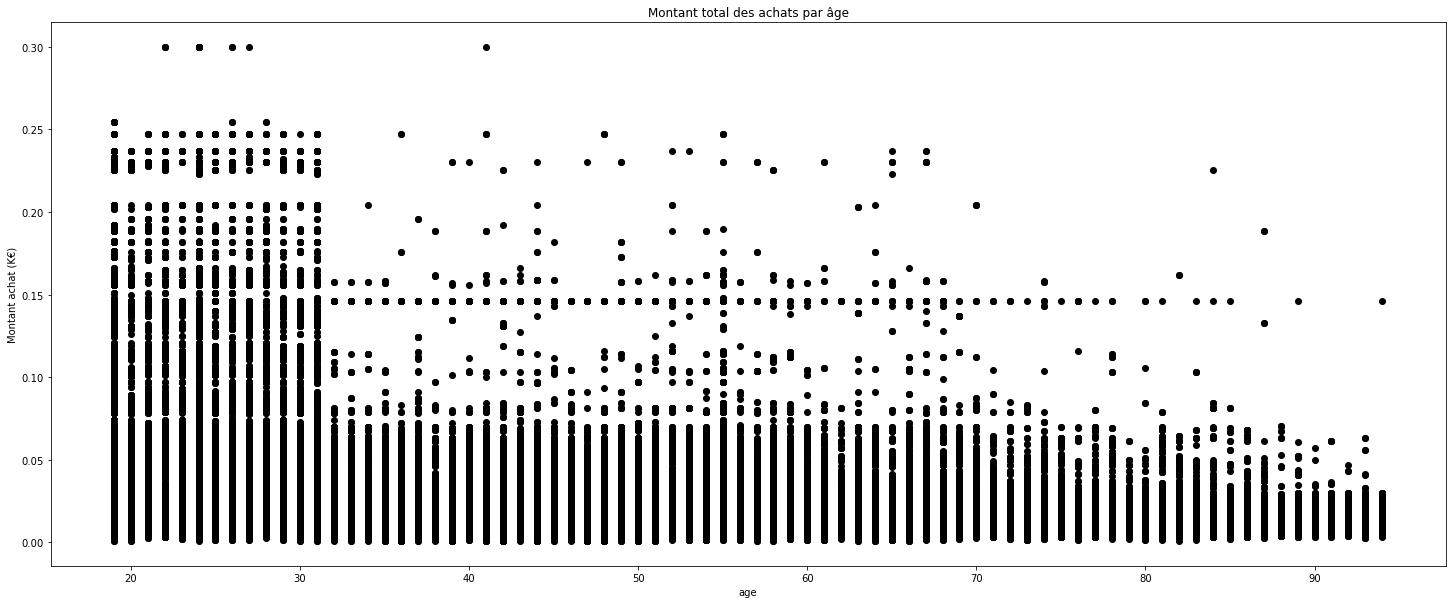

In [326]:
plt.figure(figsize=(25,10))
plt.plot(age_CA.age, age_CA.price, 'o', color='black')
plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title("Montant total des achats par âge")
plt.show()


### 4.4.1 Coefficient de corrélation linéaire de Pearson

In [335]:
coef_age_price = stats.pearsonr(age_CA.age, age_CA.price)
coef_age_price

# Interprétation du p-value avec un seuil alpha de 0,05
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    significance = "La corrélation est statistiquement significative (p-value < 0,05)."
else:
    significance = "La corrélation n'est pas statistiquement significative (p-value >= 0,05)."

# Affichage des résultats
print("Interprétation du p-value avec un seuil alpha de 0,05:", significance)
print("Coefficient de corrélation de Pearson:", coef_age_price)
print("p-value:", p_value)

Interprétation du p-value avec un seuil alpha de 0,05: La corrélation est statistiquement significative (p-value < 0,05).
Coefficient de corrélation de Pearson: (-0.20749608778803133, 0.0)
p-value: 0.0


Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. De plus le coefficient tend vers (-1). Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.

### 4.4.1.1 Coefficient de corrélation linéaire de spearman

In [333]:
correlation, p_value = stats.spearmanr(age_CA.age, age_CA.price)
#print( correlation)
#print(p_value)

# Interprétation du p-value avec un seuil alpha de 0,05
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    significance = "La corrélation est statistiquement significative (p-value < 0,05)."
else:
    significance = "La corrélation n'est pas statistiquement significative (p-value >= 0,05)."

# Affichage des résultats

print("Interprétation du p-value avec un seuil alpha de 0,05:", significance)
print("Coefficient de corrélation de Spearman:", correlation)
print("p-value:", p_value)


Interprétation du p-value avec un seuil alpha de 0,05: La corrélation est statistiquement significative (p-value < 0,05).
Coefficient de corrélation de Spearman: -0.05546489462131949
p-value: 0.0


In [304]:
transactions_profil.head()

,id_prod,date,session_id,client_id,clé composite,année_mois,date2,date_ok,annee,mois,jour,price,categ,sex,birth,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,c_3292021-03-01 00:01:07.843138,2021-03,2021-03-01,2021-03-01,2021,3,1,11.99,0,f,1967,56,50-59
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,c_6642021-03-01 00:02:26.047414,2021-03,2021-03-01,2021-03-01,2021,3,1,19.37,0,m,1960,63,60-69
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,c_5802021-03-01 00:02:38.311413,2021-03,2021-03-01,2021-03-01,2021,3,1,4.50,0,m,1988,35,30-39
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,c_79122021-03-01 00:04:54.559692,2021-03,2021-03-01,2021-03-01,2021,3,1,6.55,0,f,1989,34,30-39
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,c_20332021-03-01 00:05:18.801198,2021-03,2021-03-01,2021-03-01,2021,3,1,16.49,0,f,1956,67,60-69


### 4.4.2 calcul de la session_id representant la frequence

In [305]:
customers_freq = transactions_profil[['session_id', 'client_id']].groupby('client_id').count().reset_index()
customers_freq
df_tmp = transactions_profil[['age', 'client_id']].drop_duplicates()
df_tmp
customers_freq = customers_freq.merge(df_tmp)
customers_freq

,client_id,session_id,age
0,c_1,43,68
1,c_10,58,67
2,c_100,8,31
3,c_1000,126,57
4,c_1001,103,41
...,...,...,...
8595,c_995,14,68
8596,c_996,96,53
8597,c_997,59,29
8598,c_998,55,22


#### 4.4.2.1 Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle) sans les quatre client pro pour une meillleur visibilité


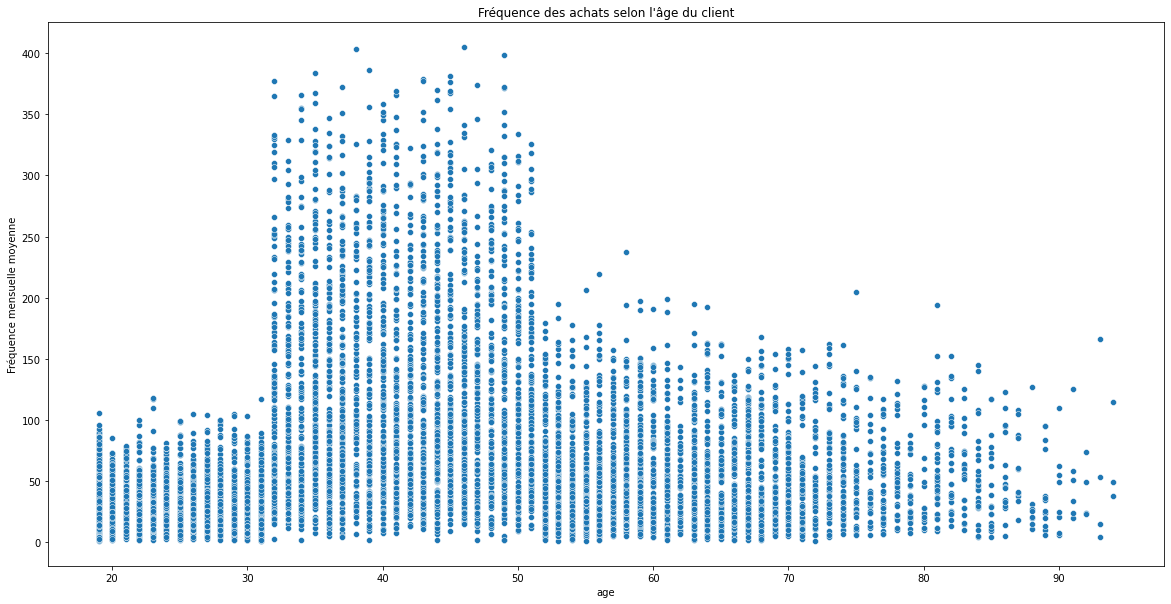

In [306]:
identifiants_a_exclure = ["c_1609", "c_3454", "c_4958", "c_6714"]
customers_freq = customers_freq[~customers_freq['client_id'].isin(identifiants_a_exclure)]

# Créer le scatterplot
plt.figure(figsize=(20, 10))
sns.scatterplot(x="age", y="session_id", data=customers_freq)
plt.xlabel('age')
plt.ylabel("Fréquence mensuelle moyenne")
plt.title("Fréquence des achats selon l'âge du client")
# Pas besoin de "legend()" pour un scatterplot, car il n'y a pas de légende dans ce contexte
plt.show()

In [308]:
coef_customers_freq = stats.pearsonr(customers_freq.age, customers_freq.session_id)
print(coef_customers_freq[0])
print(coef_customers_freq[1])

0.030327901870329816
0.004922261715844098


Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leur fréquence d'achat. Il semblerait que des groupes de clients se formalisent sur cette corrélation, par exemple entre 18 et 30 ans

### 4.4.2.1 coefficient de corrélation linéaire de spearman

In [309]:
x = customers_freq['age']
y = customers_freq['session_id']

# Appliquez le test de Spearman
correlation, p_value = stats.spearmanr(x, y)

# Affichez les résultats
print(f"Corrélation de Spearman : {correlation}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une corrélation significative entre x et y.")
else:
    print("Il n'y a pas de corrélation significative entre x et y.")


Corrélation de Spearman : 0.12766191018445167
Valeur p : 1.4497470156818763e-32
Il y a une corrélation significative entre x et y.


## 4.5 Corrélations entre groupe d'âge et panier moyen => 1 variable qualitative et 1 variable quantitative : ANOVA

Données QUALI (tranches d'âge)/QUANTI (montant dépensé) => ANOVA Analyse de la variance : formule statistique utilisée pour comparer les variances entre la ou les moyennes de différents groupes. Elle est utilisée dans de nombreux scénarios pour déterminer s'il existe une différence entre les moyennes de différents groupes.
L'ANOVA est une modélisation qui essaie d'expliquer les variations de la variable quantitative en fonction des modalités de la variable qualitative.
Elle permet de calculer le rapport de corrélation, noté  η2 utile pour évaluer numériquement la corrélation

In [310]:
panier_moyen_age = transactions_profil.pivot_table(index=["client_id"], values=["price"], aggfunc=['mean'])
panier_moyen_age_reset = panier_moyen_age.reset_index(drop=False)
panier_moyen_age_reset.columns = panier_moyen_age_reset.columns.droplevel(1)
panier_moyen_age_reset = panier_moyen_age_reset.rename(columns = {'mean' : 'panier_moyen'})
panier_moyen_age_reset

,client_id,panier_moyen
0,c_1,14.628372
1,c_10,23.337931
2,c_100,31.856250
3,c_1000,18.189524
4,c_1001,17.707282
...,...,...
8595,c_995,13.529286
8596,c_996,17.055625
8597,c_997,25.254407
8598,c_998,51.313091


## 4.5.1 Jointure pour ajouter l'age sur la dataframe panier_moyen_age_reset

In [311]:
panier_moyen_age_reset_final = pd.merge(panier_moyen_age_reset, customers_freq, on="client_id", how="inner")
panier_moyen_age_reset_final

,client_id,panier_moyen,session_id,age
0,c_1,14.628372,43,68
1,c_10,23.337931,58,67
2,c_100,31.856250,8,31
3,c_1000,18.189524,126,57
4,c_1001,17.707282,103,41
...,...,...,...,...
8591,c_995,13.529286,14,68
8592,c_996,17.055625,96,53
8593,c_997,25.254407,59,29
8594,c_998,51.313091,55,22


## 4.5.3 test de levene

In [312]:
panier_moyen_age_reset_final.loc[(panier_moyen_age_reset_final['age'] <= 30), 'groupe_age'] = 'groupe_1'
panier_moyen_age_reset_final.loc[(panier_moyen_age_reset_final['age'] >= 31) & (panier_moyen_age_reset_final['age']<= 50), 'groupe_age'] = 'groupe_2'
panier_moyen_age_reset_final.loc[(panier_moyen_age_reset_final['age'] >= 51) & (panier_moyen_age_reset_final['age']<= 70), 'groupe_age'] = 'groupe_3'
panier_moyen_age_reset_final.loc[(panier_moyen_age_reset_final['age'] >= 71), 'groupe_age'] = 'groupe_4' 
panier_moyen_age_reset_final


,client_id,panier_moyen,session_id,age,groupe_age
0,c_1,14.628372,43,68,groupe_3
1,c_10,23.337931,58,67,groupe_3
2,c_100,31.856250,8,31,groupe_2
3,c_1000,18.189524,126,57,groupe_3
4,c_1001,17.707282,103,41,groupe_2
...,...,...,...,...,...
8591,c_995,13.529286,14,68,groupe_3
8592,c_996,17.055625,96,53,groupe_3
8593,c_997,25.254407,59,29,groupe_1
8594,c_998,51.313091,55,22,groupe_1


In [313]:
stats.levene(panier_moyen_age_reset_final[panier_moyen_age_reset_final.groupe_age == 'groupe_1']['panier_moyen'],
            panier_moyen_age_reset_final[panier_moyen_age_reset_final.groupe_age == 'groupe_2']['panier_moyen'],
            panier_moyen_age_reset_final[panier_moyen_age_reset_final.groupe_age == 'groupe_3']['panier_moyen'],
            panier_moyen_age_reset_final[panier_moyen_age_reset_final.groupe_age == 'groupe_4']['panier_moyen'], 
             center = 'median')
# Niveau de signification (alpha)
alpha = 0.05

# Interprétation des résultats
if p_value < alpha:
    print(f"La p-value est {p_value:.4f}, donc on rejette l'hypothèse nulle.")
    print("Il y a des preuves statistiques que les variances des groupes ne sont pas égales.")
else:
    print(f"La p-value est {p_value:.4f}, donc on n'a pas suffisamment de preuves pour rejeter l'hypothèse nulle.")
    print("Les variances des groupes sont approximativement égales.")

La p-value est 0.0000, donc on rejette l'hypothèse nulle.
Il y a des preuves statistiques que les variances des groupes ne sont pas égales.


## 4.5.4 test de kruskal wallis

In [314]:
groupe_1 = panier_moyen_age_reset_final['panier_moyen'].loc[panier_moyen_age_reset_final['groupe_age'] == 'groupe_1'].to_list()
groupe_2 = panier_moyen_age_reset_final['panier_moyen'].loc[panier_moyen_age_reset_final['groupe_age'] == 'groupe_2'].to_list()
groupe_3 = panier_moyen_age_reset_final['panier_moyen'].loc[panier_moyen_age_reset_final['groupe_age'] == 'groupe_3'].to_list()
groupe_4 = panier_moyen_age_reset_final['panier_moyen'].loc[panier_moyen_age_reset_final['groupe_age'] == 'groupe_4'].to_list()
kruskal_result = stats.kruskal(groupe_1, groupe_2, groupe_3, groupe_4)
print(kruskal_result)
print("Statistique de test de Kruskal-Wallis :", kruskal_result.statistic)

# Interprétation de la valeur de p :
if kruskal_result.pvalue < 0.05:
    print("Les groupes sont significativement différents (rejeter l'hypothèse nulle).")
else:
    print("Il n'y a pas de preuve significative que les groupes diffèrent les uns des autres ")

# Si la valeur de p est inférieure au seuil de signification (généralement 0.05), vous pouvez conclure que les moyennes des groupes sont statistiquement différentes. Si la valeur de p est supérieure à 0.05, vous ne disposez pas de preuve suffisante pour affirmer que les groupes diffèrent de manière significative.


KruskalResult(statistic=5150.357538987644, pvalue=0.0)
Statistique de test de Kruskal-Wallis : 5150.357538987644
Les groupes sont significativement différents (rejeter l'hypothèse nulle).


### 4.5.4.1 boxplot par groupe_age et panier_moyen 

No handles with labels found to put in legend.


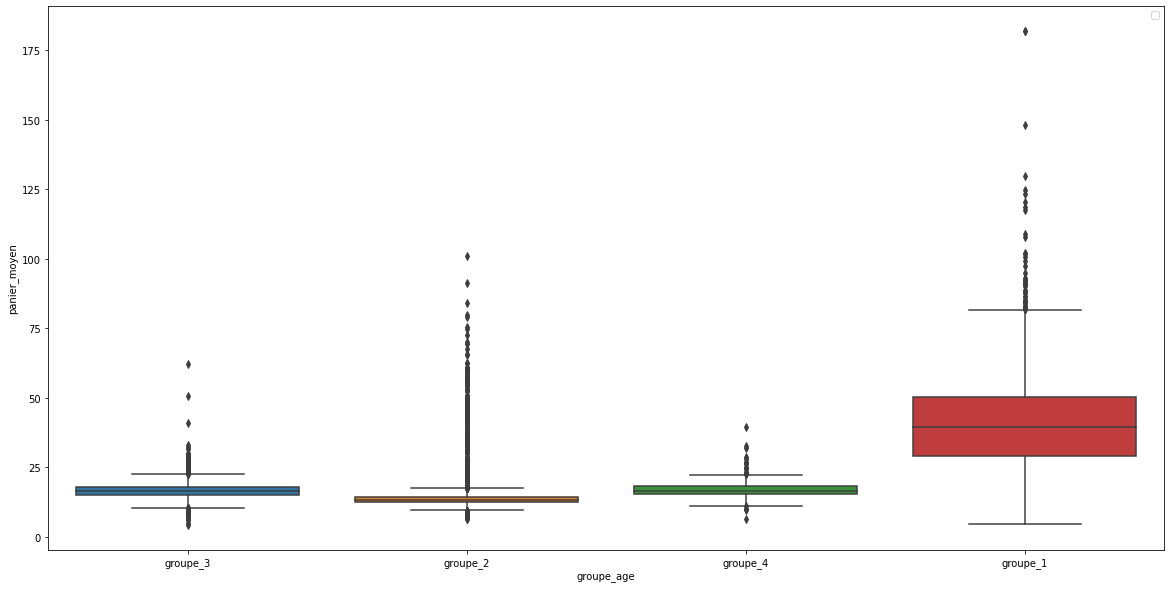

In [324]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "groupe_age", y = "panier_moyen", data =panier_moyen_age_reset_final )
plt.xlabel('groupe_age') 
plt.ylabel("panier_moyen")
plt.title("")
plt.legend()
plt.show() 